In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Teledoc
tdoc = pdr.get_data_yahoo('TDOC','2019-05-31')
tdoc.drop('Adj Close', axis=1, inplace=True)
tdoc.drop('High', axis=1, inplace=True)
tdoc.drop('Low', axis=1, inplace=True)

# Get the moving averages
tdoc['3-day'] = tdoc['Close'].rolling(3).mean()
tdoc['9-day'] = tdoc['Close'].rolling(9).mean()
tdoc['21-day'] = tdoc['Close'].rolling(21).mean()
tdoc['Change'] = np.log(tdoc.Close / tdoc.Close.shift())

# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_9v21'] = np.where(tdoc['9-day'] > tdoc['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_9v21'] = np.where(tdoc['9-day'] < tdoc['21-day'],-1,tdoc['position_9v21'])

# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_3v9'] = np.where(tdoc['3-day'] > tdoc['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_3v9'] = np.where(tdoc['3-day'] < tdoc['9-day'],-1,tdoc['position_3v9'])

tdoc['Volatility_21d'] = tdoc.Change.rolling(21).std().shift()
tdoc['Volatility_9d'] = tdoc.Change.rolling(9).std().shift()
tdoc['Volatility_3d'] = tdoc.Change.rolling(3).std().shift()

tdoc.tail()

,Open,Close,Volume,3-day,9-day,21-day,Change,position_9v21,position_3v9,Volatility_21d,Volatility_9d,Volatility_3d
Date,,,,,,,,,,,,
2021-05-28,150.869995,150.580002,3100800,149.300003,143.644446,146.825239,0.010548,-1,1,0.036135,0.017595,0.010903
2021-06-01,153.869995,152.360001,2722600,150.646667,145.085558,145.873334,0.011752,-1,1,0.031898,0.015136,0.011262
2021-06-02,151.300003,152.740005,1902000,151.893336,146.844447,145.374762,0.002491,1,1,0.031976,0.015060,0.003844
2021-06-03,151.490005,146.589996,2831700,150.563334,147.433336,144.813810,-0.041098,1,1,0.030001,0.011444,0.005035
2021-06-04,147.179993,146.570007,2258400,148.633336,148.105559,144.317620,-0.000136,1,1,0.030585,0.019120,0.028222


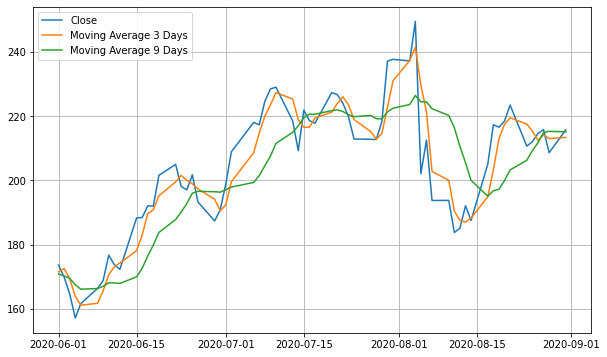

In [2]:
start='20200601'
end= '20200831'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
# plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)
plt.savefig('fifth-3m-close-tdoc.png')

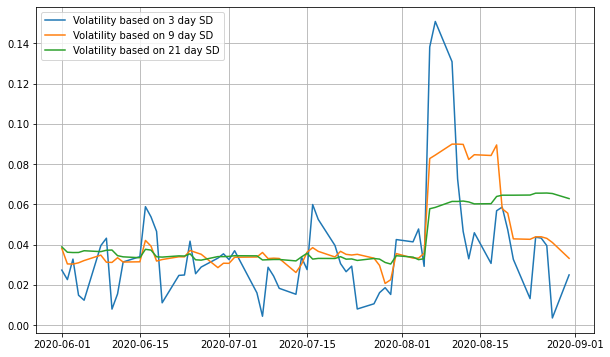

In [3]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Volatility_3d'][start:end],label='Volatility based on 3 day SD')
plt.plot(tdoc['Volatility_9d'][start:end],label='Volatility based on 9 day SD')
plt.plot(tdoc['Volatility_21d'][start:end],label='Volatility based on 21 day SD')
plt.legend(loc=2)
plt.savefig('fifth-3m-volatility-tdoc.png')

In [4]:
tdoc['Volatility_3d']['2019-07-30']

0.039070808623444205

In [5]:
tdoc['Volatility_3d'].std()

0.023740392579373194

In [6]:
tdoc['Volatility_3d'].mean()

0.03240905697628995

In [7]:
tdoc['Volatility_3d'].describe()

count    505.000000
mean       0.032409
std        0.023740
min        0.000847
25%        0.016208
50%        0.027983
75%        0.041046
max        0.151721
Name: Volatility_3d, dtype: float64

(array([11., 27., 17., 34., 32., 32., 39., 30., 32., 31., 40., 18., 26.,
        22., 16., 20.,  6., 13.,  7.,  8.,  3.,  1.,  6.,  5.,  3.,  4.,
         1.,  2.,  3.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  3.,  0.,
         2.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([0.00084738, 0.00386485, 0.00688231, 0.00989978, 0.01291724,
        0.01593471, 0.01895217, 0.02196964, 0.0249871 , 0.02800457,
        0.03102204, 0.0340395 , 0.03705697, 0.04007443, 0.0430919 ,
        0.04610936, 0.04912683, 0.05214429, 0.05516176, 0.05817922,
        0.06119669, 0.06421415, 0.06723162, 0.07024908, 0.07326655,
        0.07628401, 0.07930148, 0.08231894, 0.08533641, 0.08835387,
        0.09137134, 0.0943888 , 0.09740627, 0.10042373, 0.1034412 ,
        0.10645866, 0.10947613, 0.11249359, 0.11551106, 0.11852852,
        0.12154599, 0.12456345, 0.12758092, 0.13059838, 0.13361585,
        0.13663331, 0.13965078, 0.14266824, 0.14568571, 0.14870317,
        0.15172064]),
 <BarContainer

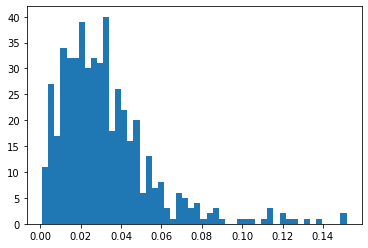

In [8]:
plt.hist(tdoc['Volatility_3d'],bins=50)

In [9]:
tdoc['actual_change'] = tdoc['Close'] - tdoc['Close'].shift()

In [10]:
tdoc['exp_change'] = tdoc['Close'].shift() * tdoc['Volatility_9d']

In [11]:
# tdoc_clean = tdoc.iloc[22:].copy()

<AxesSubplot:xlabel='Date'>

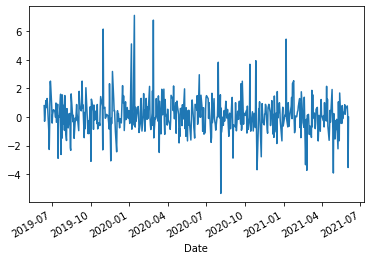

In [12]:
tdoc['Magnitude'] = tdoc['actual_change'] / tdoc['exp_change']
tdoc['Magnitude'].plot()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  4.,  2.,  2.,  5.,
         0., 11., 10., 14., 31., 31., 41., 47., 56., 57., 43., 40., 25.,
        22., 17.,  8.,  5.,  7.,  5.,  0.,  1.,  1.,  0.,  2.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([-5.32846157, -5.07981109, -4.8311606 , -4.58251011, -4.33385963,
        -4.08520914, -3.83655865, -3.58790817, -3.33925768, -3.09060719,
        -2.8419567 , -2.59330622, -2.34465573, -2.09600524, -1.84735476,
        -1.59870427, -1.35005378, -1.1014033 , -0.85275281, -0.60410232,
        -0.35545183, -0.10680135,  0.14184914,  0.39049963,  0.63915011,
         0.8878006 ,  1.13645109,  1.38510158,  1.63375206,  1.88240255,
         2.13105304,  2.37970352,  2.62835401,  2.8770045 ,  3.12565498,
         3.37430547,  3.62295596,  3.87160645,  4.12025693,  4.36890742,
         4.61755791,  4.86620839,  5.11485888,  5.36350937,  5.61215985,
         5.86081034,  6.10946083,  6.35811132,  6.6067618 ,

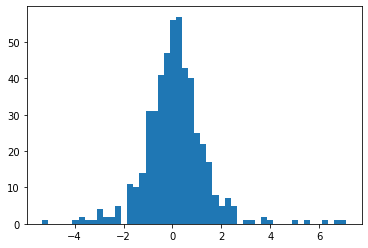

In [13]:
plt.hist(tdoc['Magnitude'], bins=50)

In [14]:
tdoc['abs_magni'] = np.abs(tdoc['Magnitude'])

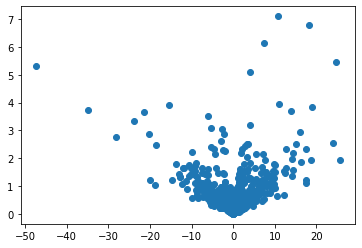

In [15]:
plt.scatter(tdoc['actual_change'], tdoc['abs_magni'])

In [16]:
tdoc.head(30)

,Open,Close,Volume,3-day,9-day,21-day,Change,position_9v21,position_3v9,Volatility_21d,Volatility_9d,Volatility_3d,actual_change,exp_change,Magnitude,abs_magni
Date,,,,,,,,,,,,,,,,
2019-05-30,58.500000,58.099998,1035300,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,57.099998,58.119999,627000,NaN,NaN,NaN,0.000344,0,0,NaN,NaN,NaN,0.020000,NaN,NaN,NaN
2019-06-03,58.000000,53.980000,2052300,56.733332,NaN,NaN,-0.073896,0,0,NaN,NaN,NaN,-4.139999,NaN,NaN,NaN
2019-06-04,54.500000,55.750000,1825900,55.949999,NaN,NaN,0.032264,0,0,NaN,NaN,NaN,1.770000,NaN,NaN,NaN
2019-06-05,56.450001,55.139999,943400,54.956666,NaN,NaN,-0.011002,0,0,NaN,NaN,0.054468,-0.610001,NaN,NaN,NaN
2019-06-06,55.150002,54.270000,716500,55.053333,NaN,NaN,-0.015904,0,0,NaN,NaN,0.053382,-0.869999,NaN,NaN,NaN
2019-06-07,54.660000,55.700001,713000,55.036667,NaN,NaN,0.026009,0,0,NaN,NaN,0.026508,1.430000,NaN,NaN,NaN
2019-06-10,56.580002,57.470001,1042300,55.813334,NaN,NaN,0.031283,0,0,NaN,NaN,0.022915,1.770000,NaN,NaN,NaN
2019-06-11,58.099998,58.070000,815300,57.080001,56.288889,NaN,0.010386,0,1,NaN,NaN,0.025856,0.599998,NaN,NaN,NaN


In [17]:
tdoc['position_3v9'].diff()[start:end][tdoc['position_3v9'].diff() !=0].index.values

array(['2020-06-01T00:00:00.000000000', '2020-06-03T00:00:00.000000000',
       '2020-06-10T00:00:00.000000000', '2020-06-29T00:00:00.000000000',
       '2020-07-02T00:00:00.000000000', '2020-07-15T00:00:00.000000000',
       '2020-07-21T00:00:00.000000000', '2020-07-24T00:00:00.000000000',
       '2020-07-30T00:00:00.000000000', '2020-08-06T00:00:00.000000000',
       '2020-08-18T00:00:00.000000000', '2020-08-27T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [18]:
tdoc['position_3v9'].diff()[start:end][tdoc['position_3v9'].diff() !=0]

Date
2020-06-01    2.0
2020-06-03   -2.0
2020-06-10    2.0
2020-06-29   -2.0
2020-07-02    2.0
2020-07-15   -2.0
2020-07-21    2.0
2020-07-24   -2.0
2020-07-30    2.0
2020-08-06   -2.0
2020-08-18    2.0
2020-08-27   -2.0
Name: position_3v9, dtype: float64

In [19]:
tdoc

,Open,Close,Volume,3-day,9-day,21-day,Change,position_9v21,position_3v9,Volatility_21d,Volatility_9d,Volatility_3d,actual_change,exp_change,Magnitude,abs_magni
Date,,,,,,,,,,,,,,,,
2019-05-30,58.500000,58.099998,1035300,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,57.099998,58.119999,627000,NaN,NaN,NaN,0.000344,0,0,NaN,NaN,NaN,0.020000,NaN,NaN,NaN
2019-06-03,58.000000,53.980000,2052300,56.733332,NaN,NaN,-0.073896,0,0,NaN,NaN,NaN,-4.139999,NaN,NaN,NaN
2019-06-04,54.500000,55.750000,1825900,55.949999,NaN,NaN,0.032264,0,0,NaN,NaN,NaN,1.770000,NaN,NaN,NaN
2019-06-05,56.450001,55.139999,943400,54.956666,NaN,NaN,-0.011002,0,0,NaN,NaN,0.054468,-0.610001,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,150.869995,150.580002,3100800,149.300003,143.644446,146.825239,0.010548,-1,1,0.036135,0.017595,0.010903,1.580002,2.621667,0.602671,0.602671
2021-06-01,153.869995,152.360001,2722600,150.646667,145.085558,145.873334,0.011752,-1,1,0.031898,0.015136,0.011262,1.779999,2.279204,0.780974,0.780974
2021-06-02,151.300003,152.740005,1902000,151.893336,146.844447,145.374762,0.002491,1,1,0.031976,0.015060,0.003844,0.380005,2.294499,0.165616,0.165616
